In [1]:
import numpy as np
from tqdm import tqdm
from figaro.mixture import DPGMM, HDPGMM
from figaro.plot import plot_median_cr
from figaro.utils import get_priors
import os

In [2]:
single_event_posteriors = [np.loadtxt('experiments/'+filename) for filename in os.listdir('experiments') if filename.endswith('.txt')]

In [3]:
n_draws = 10
x_min = 6.665
x_max = 6.685

posteriors = []
for experiment in tqdm(single_event_posteriors, desc = 'Experiments'):
    mix = DPGMM([[x_min, x_max]], prior_pars=get_priors([[x_min, x_max]], experiment, hierarchical=False))
    draws = []
    for _ in range(n_draws):
        draws.append(mix.density_from_samples(experiment))
    posteriors.append(draws)

Experiments: 100%|██████████| 16/16 [00:21<00:00,  1.36s/it]


In [4]:
n_draws_hier = 100
hier_mix = HDPGMM([[x_min, x_max]], prior_pars=get_priors([[x_min, x_max]], single_event_posteriors, hierarchical=True))

hier_draws = []

for _ in tqdm(range(n_draws_hier)):
    hier_draws.append(hier_mix.density_from_samples(posteriors))

100%|██████████| 100/100 [00:01<00:00, 83.96it/s]


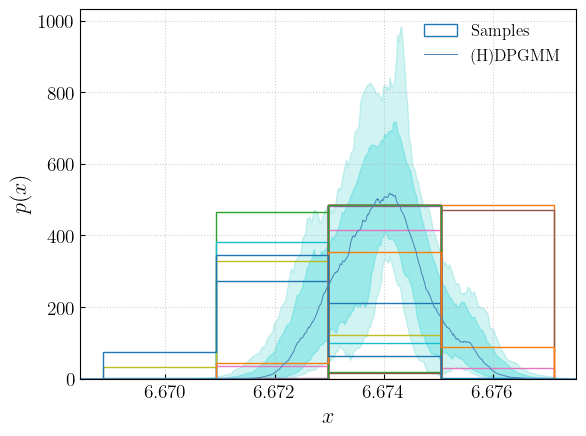

In [5]:
plot_median_cr(hier_draws,
               samples = single_event_posteriors,
               show = True,
               hierarchical = True,
               save = True
               )